In [2]:
import findspark
findspark.init()

In [3]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import matplotlib.pyplot as plt

In [8]:
from pyspark.sql import SparkSession

from os.path import abspath
warehouse_location = abspath('spark-warehouse')

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL Hive integration example") \
    .config("spark.sql.warehouse.dir", "hdfs://node1/user/hive/warehouse/speed_camera_violations_fix") \
    .enableHiveSupport() \
    .getOrCreate()

In [12]:
speed_camera = spark.sql("select * from speed_camera_violations_fix")
speed_camera = speed_camera.withColumn("violation_day", speed_camera["violation_date"].substr(9,2))
speed_camera = speed_camera.groupBy('violation_day').agg({'violations':'sum'})

In [13]:
x1=speed_camera.select('violation_day').rdd.flatMap(lambda x: x).collect()
y1 = speed_camera.select("sum(violations)").rdd.flatMap(lambda x: x).collect()

In [15]:
import pandas as pd

x2 = pd.array(x1)
df = pd.DataFrame(list(zip(x1, y1)),columns =['day', 'violations'])
df = df[(df["day"] == '21') | (df["day"] == '22') | (df["day"] == '23') | (df["day"] == '24') | (df["day"] == '25') | (df["day"] == '26') |  (df["day"] == '27') ]
df = df.reset_index()
df["weekDay"] = "Monday"
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

In [16]:
import datetime
for i in range(7):
    this    = datetime.date(2022,12,int(df.iloc[i,1]))
    thisDay = this.weekday()
    df["weekDay"][i] = weekDays[thisDay]

/tmp/ipykernel_25026/955810043.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["weekDay"][i] = weekDays[thisDay]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


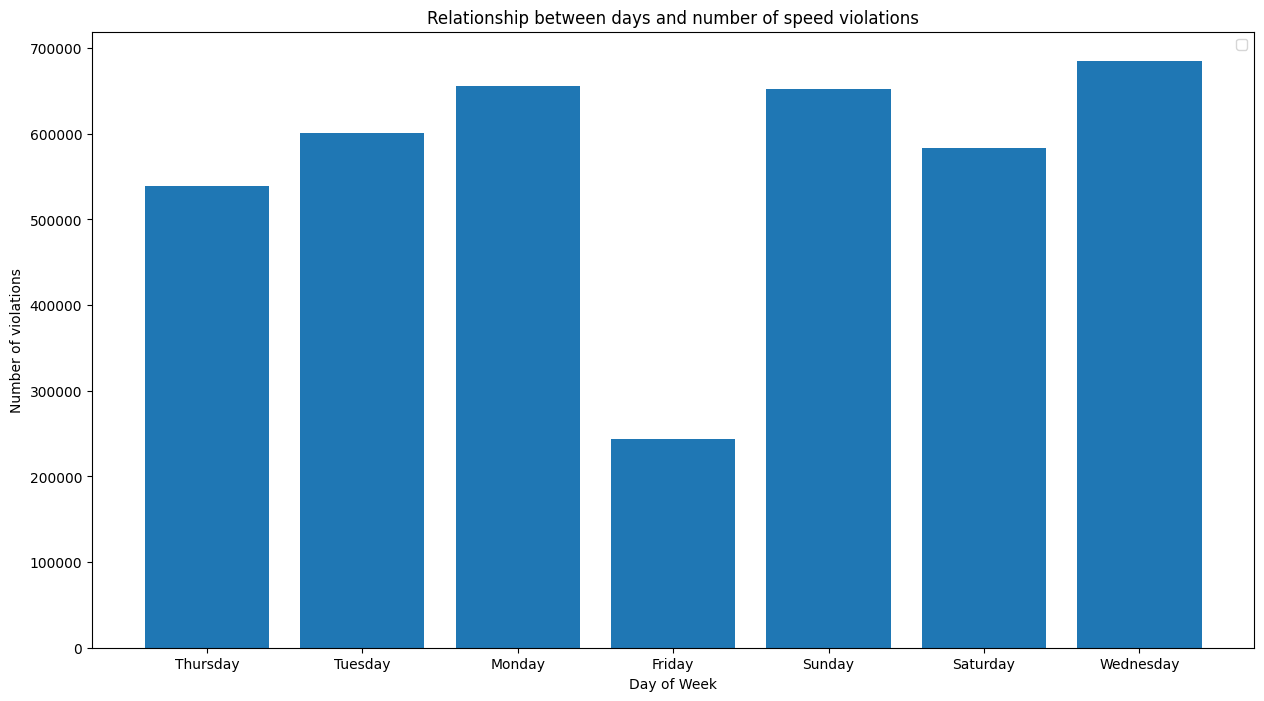

In [17]:
fig, ax = plt.subplots(1,1, figsize=(15, 8))
ax.bar(df["weekDay"], df["violations"])
ax.set_ylabel('Number of violations')
ax.set_xlabel('Day of Week')
ax.set_title("Relationship between days and number of speed violations")
ax.legend()
plt.show()
